In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dtracks = pd.read_csv('DS_1_train_augmented.csv', index_col=0)


/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


event_id


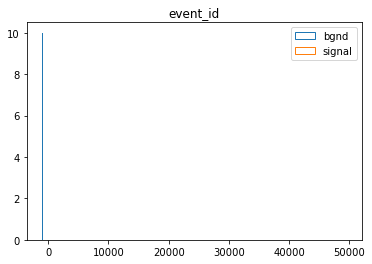

X


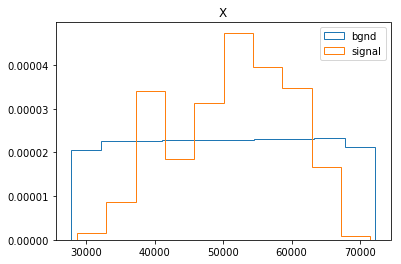

Y


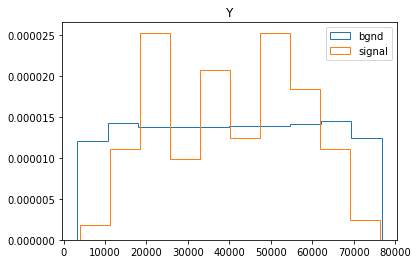

Z


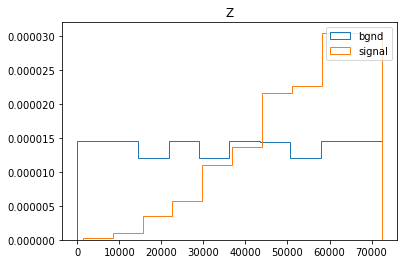

TX


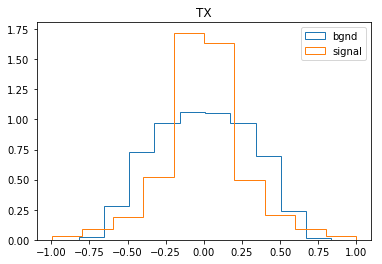

TY


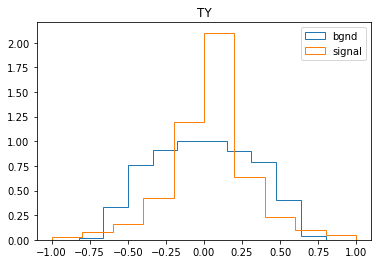

chi2


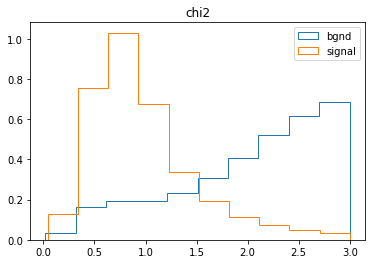

signal


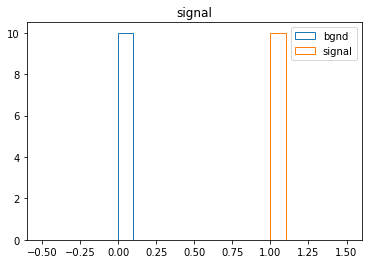

dist_to_electron


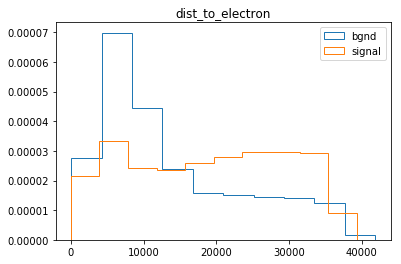

angle_to_electron


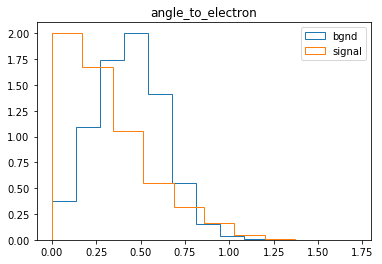

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

for feature in list(dtracks):
    print (feature)
    plt.title(feature)
    plt.hist(dtracks[dtracks['signal'] == 0][feature], histtype='step', label='bgnd', normed=True)
    plt.hist(dtracks[dtracks['signal'] == 1][feature], histtype='step', label='signal', normed=True)
    plt.legend(loc='best')
    plt.show()

In [4]:
# First, strip the targets from features

feature_list = ['X', 'Y', 'Z', 'TX', 'TY', 'chi2', 'dist_to_electron', 'angle_to_electron']
#feature_list = ['X', 'Y', 'Z', 'TX', 'TY', 'chi2']

X = np.array(dtracks[feature_list].values[:])
y = np.array(dtracks['signal'].values[:])
print ("X.shape:", X.shape)
print ("Y.shape:", y.shape)
#print (X[:3])
#print (y[:3])

# Validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

X.shape: (1123177, 8)
Y.shape: (1123177,)


y_val: [ 0.  0.  0.]
val_pred: [ 0.48365599  0.45950227  0.42079246]


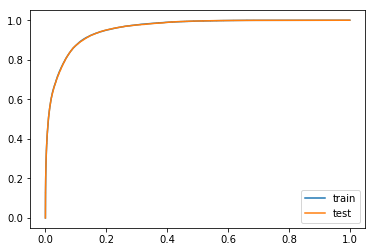

AUC train: 0.956985266411
AUC val: 0.956771679171


In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

#model = SVC(kernel='rbf', probability=True)
#model = DecisionTreeClassifier()
#model = MLPClassifier(hidden_layer_sizes=(40, 40), learning_rate_init=0.01, max_iter=1000)
model = AdaBoostClassifier(n_estimators=350, learning_rate=0.1)

model.fit(X_train, y_train)
train_predictions = model.predict_proba(X_train)[:, 1]

# Validate
val_predictions = model.predict_proba(X_val)[:, 1]

print('y_val:', y_val[:3])
print('val_pred:', val_predictions[:3])

# ROC
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
roc_auc = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label='train')

fpr_val, tpr_val, _ = roc_curve(y_val, val_predictions)
roc_auc = auc(fpr_val, tpr_val)
plt.plot(fpr_val, tpr_val, label='test')
plt.legend(loc='best')
plt.show()

print ("AUC train:", roc_auc_score(y_train, train_predictions))
print ("AUC val:", roc_auc_score(y_val, val_predictions))

In [15]:
# Load dataset
dtracks_test = pd.read_csv('DS_1_test_augmented.csv', index_col=0)

# Make predictions
X_test = np.array(dtracks_test[feature_list].values[:])
X_test = scaler.transform(X_test)

test_predictions = model.predict_proba(X_test)[:, 1]

output = pd.DataFrame(test_predictions, columns=['Prediction'])
output.index.name = 'Id'
output.to_csv('predictions.csv', header=True)

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
